In [1]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


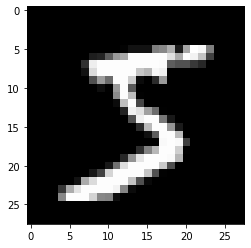

5


In [3]:
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])

In [4]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [5]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [6]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
model = Sequential()

## Declare the layers
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = Conv2D(64, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 147s 78ms/step - loss: 0.3785 - accuracy: 0.9527 - val_loss: 0.1065 - val_accuracy: 0.9706
Epoch 2/3
1875/1875 [==============================] - 152s 81ms/step - loss: 0.0684 - accuracy: 0.9792 - val_loss: 0.0893 - val_accuracy: 0.9761
Epoch 3/3
1875/1875 [==============================] - 145s 77ms/step - loss: 0.0490 - accuracy: 0.9845 - val_loss: 0.1045 - val_accuracy: 0.9738


Prediction (Softmax) from the neural network:

 [[9.9999988e-01 7.0327318e-18 1.5813875e-09 4.5569564e-15 7.2955156e-13
  3.3495837e-14 1.4310714e-07 3.4505707e-17 1.4295571e-11 5.6849110e-08]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




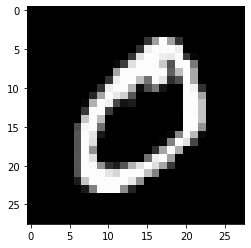



Final Output: 0


In [15]:
example = X_train[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))
## First output
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
## Second output
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
## Third output
print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))




----------------Contoured Image--------------------


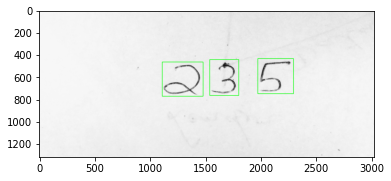

In [72]:
image = cv2.imread('predict.jpg')
kernel = np.ones((5,5), np.uint8)
img_erode = cv2.erode(image, kernel, iterations=14)
grey = cv2.cvtColor(img_erode.copy(), cv2.COLOR_BGR2GRAY)


ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=3)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)



---------------------------------------


=========PREDICTION============ 




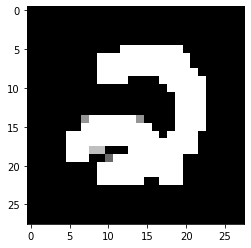



Final Output: 2

Prediction (Softmax) from the neural network:

 [[5.9210264e-10 1.7320067e-18 1.0000000e+00 4.8128830e-16 3.4321038e-15
  1.4871396e-15 5.3064674e-15 1.2381243e-09 9.8043981e-19 3.0914794e-13]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




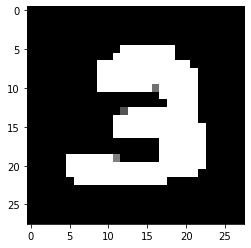



Final Output: 3

Prediction (Softmax) from the neural network:

 [[8.03938889e-08 6.02258174e-11 7.65722070e-04 9.99152422e-01
  6.50722694e-13 1.26161058e-06 3.19454038e-14 2.78958089e-11
  8.05067975e-05 1.18597505e-08]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




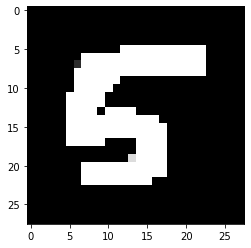



Final Output: 5

Prediction (Softmax) from the neural network:

 [[5.65393869e-13 2.44621218e-19 2.36836249e-21 1.14740645e-16
  2.35786945e-21 1.00000000e+00 1.78594327e-11 1.41322554e-23
  6.42648068e-09 1.03467054e-10]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




In [56]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")